# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#generate the url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#partial query url
query_url = f"{base_url}appid={weather_api_key}&units={units}&q=" 

In [4]:
# Set up lists to hold data
cityname=[] 
cloud=[]
ctry=[]
date=[]
humid=[]
lat=[]
lng=[]
maxtemp=[]
wind=[]

# Loop through the list of cities and perform a request for data on each
#start count at 1 instead of 0
count=1 

print('Beginning Data Retrieval')     
print('---------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:
            cityname.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humid.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' not found. Skipping to next...')
                                            
        count=count+1

Beginning Data Retrieval
---------------------------
Processing Record 1 of 593 | tuktoyaktuk
Processing Record 2 of 593 | buinsk
Processing Record 3 of 593 | pangnirtung
Processing Record 4 of 593 | duldurga
Processing Record 5 of 593 | carnarvon
Processing Record 6 of 593 | kapaa
Processing Record 7 of 593 | punta arenas
Processing Record 8 of 593 | nanortalik
Processing Record 9 of 593 | puerto ayora
Processing Record 10 of 593 | hithadhoo
Processing Record 11 of 593 | haines junction
Processing Record 12 of 593 | mataura
Processing Record 13 of 593 | sorvag
sorvag not found. Skipping to next...
Processing Record 14 of 593 | peace river
Processing Record 15 of 593 | busselton
Processing Record 16 of 593 | hobart
Processing Record 17 of 593 | port alfred
Processing Record 18 of 593 | arraial do cabo
Processing Record 19 of 593 | atuona
Processing Record 20 of 593 | georgetown
Processing Record 21 of 593 | seryshevo
Processing Record 22 of 593 | butaritari
Processing Record 23 of 593 

Processing Record 188 of 593 | lata
Processing Record 189 of 593 | tawang
Processing Record 190 of 593 | guerrero negro
Processing Record 191 of 593 | camopi
Processing Record 192 of 593 | northam
Processing Record 193 of 593 | juba
Processing Record 194 of 593 | mrirt
mrirt not found. Skipping to next...
Processing Record 195 of 593 | vaitupu
vaitupu not found. Skipping to next...
Processing Record 196 of 593 | gollere
gollere not found. Skipping to next...
Processing Record 197 of 593 | glazov
Processing Record 198 of 593 | khatanga
Processing Record 199 of 593 | bambanglipuro
Processing Record 200 of 593 | bitung
Processing Record 201 of 593 | myaundzha
Processing Record 202 of 593 | tokat
Processing Record 203 of 593 | najran
Processing Record 204 of 593 | dombarovskiy
Processing Record 205 of 593 | taksimo
Processing Record 206 of 593 | kefalovrison
kefalovrison not found. Skipping to next...
Processing Record 207 of 593 | barrow
Processing Record 208 of 593 | bowen
Processing Rec

Processing Record 376 of 593 | verkhoyansk
Processing Record 377 of 593 | san juan del sur
Processing Record 378 of 593 | andreyevo
Processing Record 379 of 593 | chara
Processing Record 380 of 593 | khasan
Processing Record 381 of 593 | tuy hoa
Processing Record 382 of 593 | verkhnyaya maksakovka
Processing Record 383 of 593 | videira
Processing Record 384 of 593 | ajra
Processing Record 385 of 593 | muroto
Processing Record 386 of 593 | mitsamiouli
Processing Record 387 of 593 | ebeltoft
Processing Record 388 of 593 | kapit
Processing Record 389 of 593 | bilma
Processing Record 390 of 593 | cockburn town
Processing Record 391 of 593 | hofn
Processing Record 392 of 593 | carballo
Processing Record 393 of 593 | tahta
Processing Record 394 of 593 | pingzhuang
Processing Record 395 of 593 | kita
Processing Record 396 of 593 | karsun
Processing Record 397 of 593 | nome
Processing Record 398 of 593 | kuantan
Processing Record 399 of 593 | nguiu
nguiu not found. Skipping to next...
Processi

Processing Record 568 of 593 | farafangana
Processing Record 569 of 593 | shimoda
Processing Record 570 of 593 | minab
Processing Record 571 of 593 | sindand
sindand not found. Skipping to next...
Processing Record 572 of 593 | silivri
Processing Record 573 of 593 | byron bay
Processing Record 574 of 593 | tocopilla
Processing Record 575 of 593 | kisangani
Processing Record 576 of 593 | palabuhanratu
palabuhanratu not found. Skipping to next...
Processing Record 577 of 593 | turayf
Processing Record 578 of 593 | misratah
Processing Record 579 of 593 | cartagena del chaira
Processing Record 580 of 593 | ugoofaaru
Processing Record 581 of 593 | kroya
Processing Record 582 of 593 | malgrat de mar
Processing Record 583 of 593 | godfrey
Processing Record 584 of 593 | halalo
halalo not found. Skipping to next...
Processing Record 585 of 593 | armacao dos buzios
armacao dos buzios not found. Skipping to next...
Processing Record 586 of 593 | college
Processing Record 587 of 593 | miajadas
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#clean up data frame to make it look better
weather_dict = {"City":cityname, "Cloudiness":cloud, "Date":date, "Humidity":humid, "Lat":lat, "Lng":lng, 
                "Max Temp":maxtemp, "Wind Speed":wind,"Country":ctry}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Country
0,Tuktoyaktuk,40,1659563135,81,69.4541,-133.0374,50.00,3.44,CA
1,Buinsk,17,1659563382,81,54.9500,48.2833,63.88,3.62,RU
2,Pangnirtung,75,1659563243,71,66.1451,-65.7125,50.00,5.75,CA
3,Dul'durga,100,1659563383,98,50.6761,113.5931,61.57,3.36,RU
4,Carnarvon,100,1659563384,58,-24.8667,113.6333,64.80,17.90,AU
...,...,...,...,...,...,...,...,...,...
539,Pisco,0,1659563647,68,-13.7000,-76.2167,66.25,14.97,PE
540,Salym,75,1659563647,75,60.0625,71.4789,54.86,2.89,RU
541,Chapais,100,1659563648,88,49.7834,-74.8492,58.78,14.47,CA
542,Luganville,22,1659563070,75,-15.5333,167.1667,82.29,8.10,VU


In [6]:
#export csv to output data folder
weather_df.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

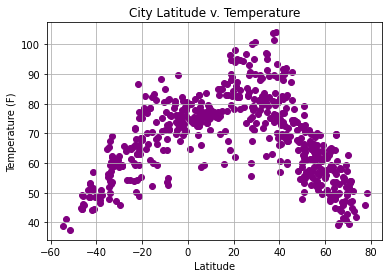

In [7]:
#plot all the scatter plots
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], color="purple")
plt.title("City Latitude v. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig1.png")
plt.show()

This scatter plot displays the relationship between latitude and temperature. The data on this graph shows that as you travel further north or south away from the equator (latitude 0), the temperature declines substantially.

## Latitude vs. Humidity Plot

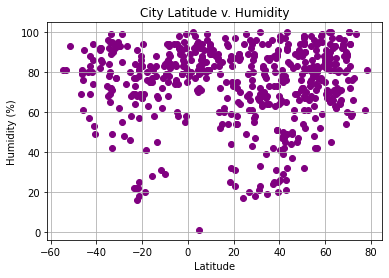

In [8]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"], color="purple")
plt.title("City Latitude v. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig2.png")
plt.show()

This scatter plot displays the relationship between latitude and humidity percentage. The data on this graph doesn't really have any strong correlations one way or the other. However, it is interesting that the area nearest the equator has hardly any values less than 60% humidity.

## Latitude vs. Cloudiness Plot

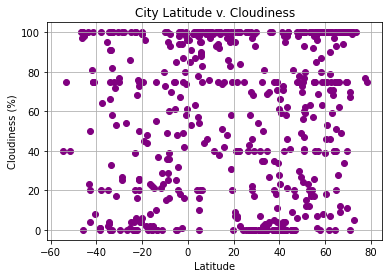

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], color="purple")
plt.title("City Latitude v. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig3.png")
plt.show()

This scatter plot displays the relationship between latitude and cloudiness percentage. The data on this graph is completely variable and does not show any correlations one way or another.

## Latitude vs. Wind Speed Plot

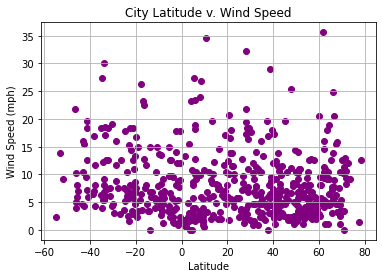

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], color="purple")
plt.title("City Latitude v. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both")
plt.savefig("output_data/Fig4.png")
plt.show()

This scatter plot displays the relationship between latitude and wind speeds. This data suggests latitude does not really play a factor in wind strength and that its more common for wind speeds to be lower than 15 miles per hour.

## Linear Regression

In [11]:
#create Northern Hem dataframe
north_df = weather_df[weather_df["Lat"]>=0]

#create Southern Hem dataframe
south_df = weather_df[weather_df["Lat"]<0]
#north_df
#south_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

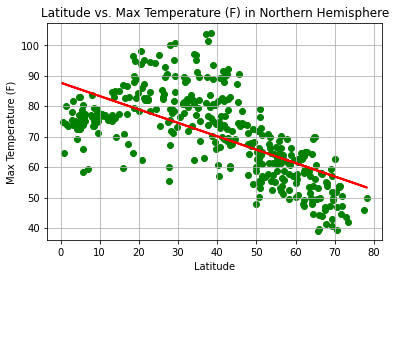

0.43


In [22]:
#create the northern and southern hem scatter plots with regression lines
x_value = north_df["Lat"]
y_value = north_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Max Temperature (F) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig5.png")
plt.show()
print(f"{round(rvalue**2,2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

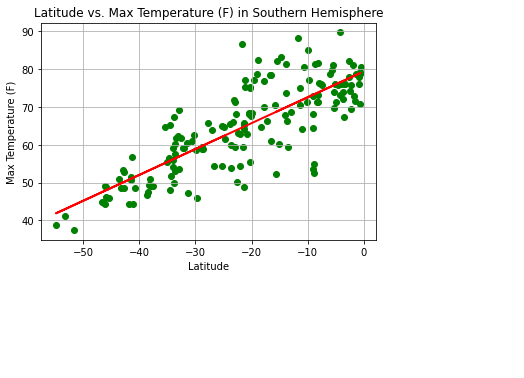

0.65


In [21]:
x_value = south_df["Lat"]
y_value = south_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value * slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Max Temperature (F) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig6.png")
plt.show()
print(f"{round(rvalue**2,2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

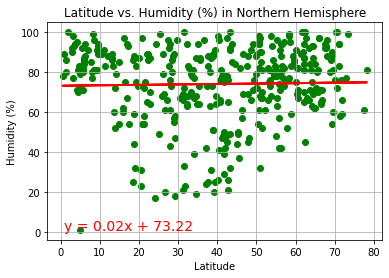

0.0


In [23]:
x_value = north_df["Lat"]
y_value = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Humidity (%) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=14)
plt.savefig("output_data/Fig7.png")
plt.show()
print(f"{round(rvalue**2,2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

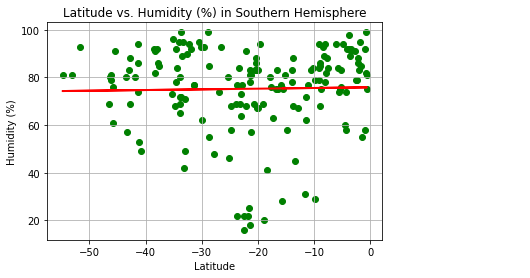

0.0


In [24]:
x_value = south_df["Lat"]
y_value = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Humidity (%) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig8.png")
plt.show()
print(f"{round(rvalue**2,2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

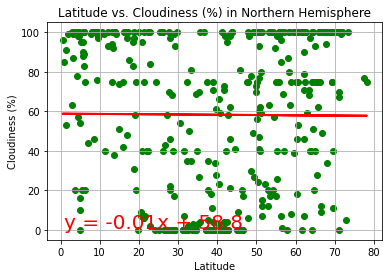

0.0


In [25]:
x_value = north_df["Lat"]
y_value = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Cloudiness (%) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=20)
plt.savefig("output_data/Fig9.png")
plt.show()
print(f"{round(rvalue**2,2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

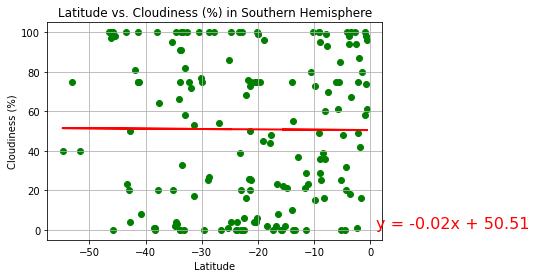

0.0


In [20]:
x_value = south_df["Lat"]
y_value = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Cloudiness (%) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig10.png")
plt.show()
print(f"{round(rvalue**2,2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

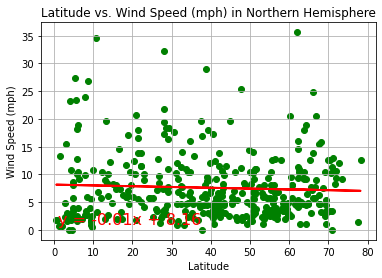

0.0


In [26]:
x_value = north_df["Lat"]
y_value = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Wind Speed (mph) in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig11.png")
plt.show()
print(f"{round(rvalue**2,2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

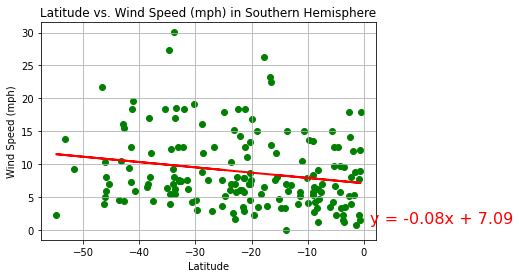

0.04


In [27]:
x_value = south_df["Lat"]
y_value = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)

regression_value = x_value *slope + intercept

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value,color="green")
plt.plot(x_value,regression_value,"red",linewidth=2)
plt.title("Latitude vs. Wind Speed (mph) in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1,1),color="red",fontsize=16)
plt.savefig("output_data/Fig12.png")
plt.show()
print(f"{round(rvalue**2,2)}")

3 Observable Trends:

1. For the analysis of latitude versus temperature in the Northern and Southern Hemispheres, it appears there is a weak (Northern) and moderate (Southern) correlation. You can see that the temperature in the Northern Hemisphere decreases, for the most part, as you travel North, and the temperature in the Southern Hemisphere decreases as you travel South.

2. Looking at the latitude versus cloudiness graphs for the Northern and Southern Hemisphere, it is clear that there is not any correlation between the two. This is backed up by the r-value, which is calculated to 0.0 for both graphs, expressing there is no correlation.

3. Lastly, the latitude versus wind speed graphs for the Northern and Southern Hemispheres do not express any correlation between the two. The Northern graph has a r-value of 0.0, expressing no correlation, while the Southern graph has a r-value of 0.04, expressing a very weak correlation.
